In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from ignore import Ignore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics * import 

SyntaxError: invalid syntax (1157429028.py, line 12)

## Load Flight price data

In [40]:
data = pd.read_csv("Flight_Booking.csv", index_col = 0)
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


## EDA

In [42]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [43]:
data['airline'].isna().sum() # No nan value present

0

In [44]:
# data['airline'][0] =  np.NaN
# data['airline'].isna().sum()

In [47]:
# TO check the nan value in data

def nan(isnull):
    return isnull.isna().sum()

print("Count of null value in airline --> ", nan(data['airline']))
print("Count of null value in flight --> ", nan(data['flight']))
print("Count of null value in source_city --> ", nan(data['source_city']))
print("Count of null value in departure_timedeparture_time --> ", nan(data['departure_time']))
print("Count of null value in stops --> ", nan(data['stops']))
print("Count of null value in arrival_time --> ", nan(data['arrival_time']))
print("Count of null value in destination_city --> ", nan(data['destination_city']))
print("Count of null value in class --> ", nan(data['class']))
print("Count of null value in duration --> ", nan(data['duration']))
print("Count of null value in days_left --> ", nan(data['days_left']))
print("Count of null value in price --> ", nan(data['price']))


Count of null value in airline -->  0
Count of null value in flight -->  0
Count of null value in source_city -->  0
Count of null value in departure_timedeparture_time -->  0
Count of null value in stops -->  0
Count of null value in arrival_time -->  0
Count of null value in destination_city -->  0
Count of null value in class -->  0
Count of null value in duration -->  0
Count of null value in days_left -->  0
Count of null value in price -->  0


## Visualize insights

In [63]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [107]:
data.groupby(['class']).get_group('Economy')

C:\Users\MayurKatre\AppData\Local\Temp\ipykernel_20716\69992521.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data.groupby(['class']).get_group('Economy')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
206662,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
206663,Vistara,UK-826,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
206664,Vistara,UK-822,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


In [108]:
result = data.groupby(['class']).agg({
    'airline': 'count',  # Count occurrences
    'price': 'mean'      # Calculate average price
})
print(result)


          airline         price
class                          
Business    93487  52540.081124
Economy    206666   6572.342383


In [110]:
# Filter data where 'class' is 'Economy'
economy_data = data[data['class'] == 'Economy']

# Group by 'airline' and count occurrences (or aggregate other metrics if needed)
grouped = economy_data.groupby('airline').size()

print(grouped)

airline
AirAsia      16098
Air_India    47994
GO_FIRST     23173
Indigo       43120
SpiceJet      9011
Vistara      67270
dtype: int64

In [101]:
data.get(['airline', 'class']).groupby("Economy")

KeyError: 'Economy'

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [ ]:
# No of planes use to operate daily by each airlines  --> No available features

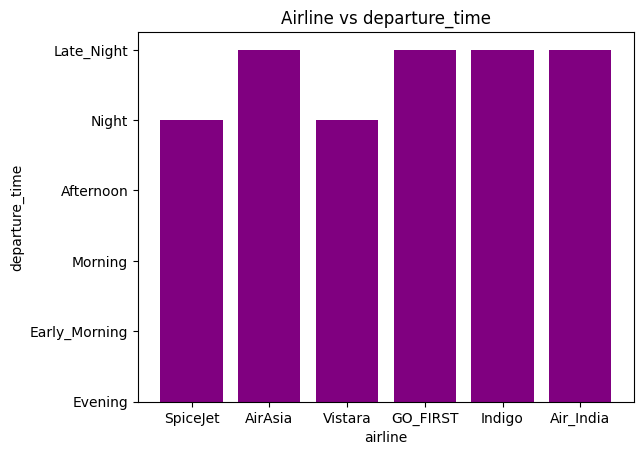

In [71]:
# Airline by departure and by source_city in bar graph

plt.bar(data['airline'], data['departure_time'],color = 'purple')
plt.xlabel('airline')
plt.ylabel('departure_time')
plt.title('Airline vs departure_time')
plt.show()

In [ ]:
# Compare flight vs 
# Compare class vs price
# price vs stops

# 

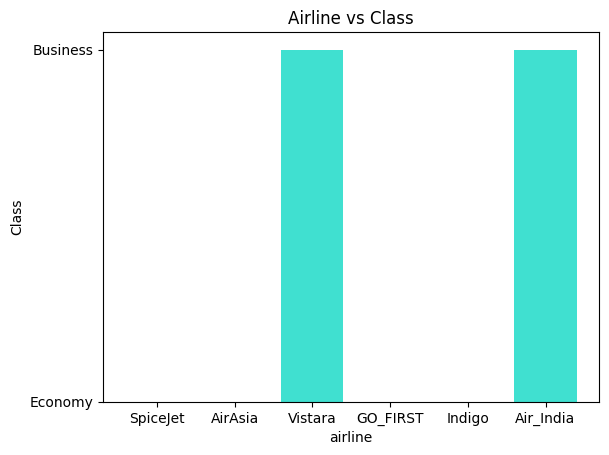

In [83]:
import matplotlib.pyplot as plt

# Assuming data is a pandas DataFrame
# Replace 'data' with your actual DataFrame
plt.bar(data['airline'], data['class'], color='#40E0D0')  # Hex code for turquoise
plt.xlabel('airline')
plt.ylabel('Class')
plt.title('Airline vs Class')
plt.show()


C:\Users\MayurKatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\MayurKatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


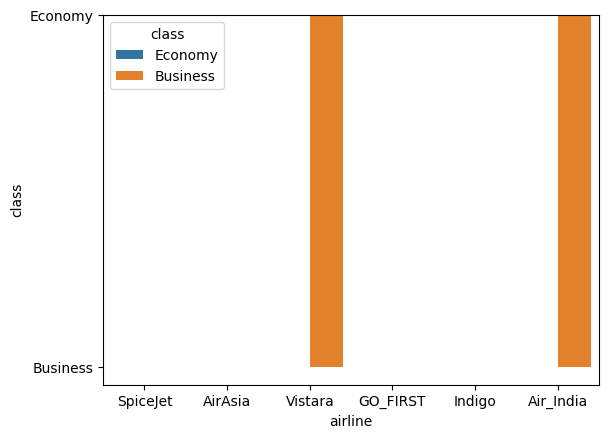

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=data, x='airline', y='class', hue='class')
plt.show()


<Axes: xlabel='class', ylabel='price'>

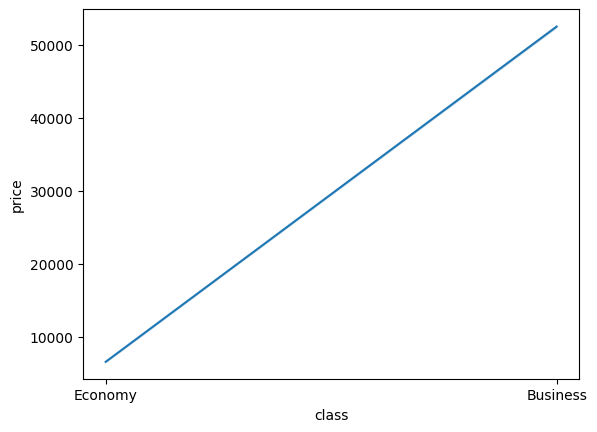

In [76]:
# draw lineplot  
sns.lineplot(x="class", y="price", data=data)

In [77]:
# departure time in pie plot


In [78]:
# compare no of flight with stops

C:\Users\MayurKatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\MayurKatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\MayurKatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C

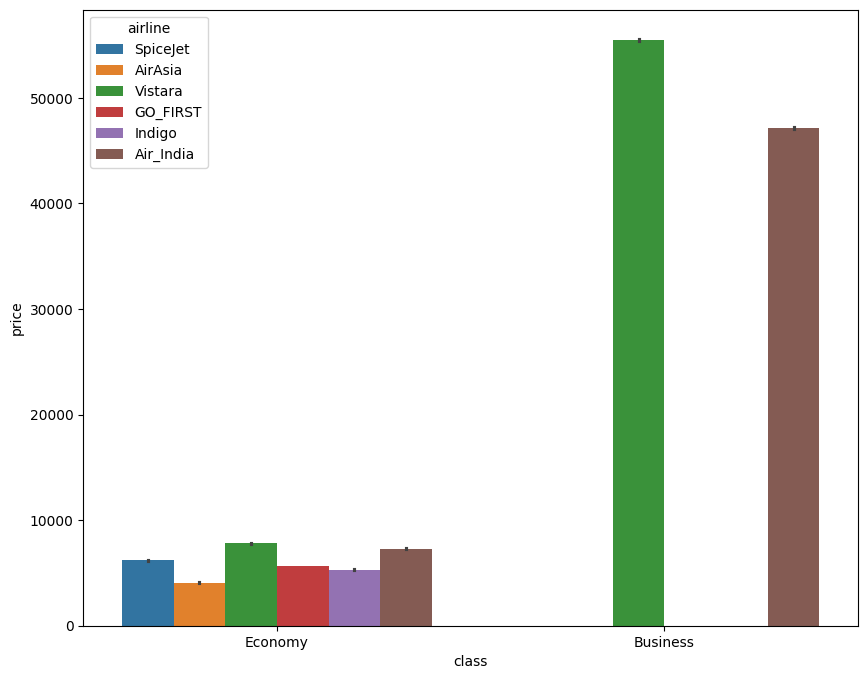

In [79]:

# Range of price of all the flights of Economy and Business class

plt.figure(figsize=(10,8))
sns.barplot(data=data,x='class',y='price',hue='airline')
plt.show()
     

C:\Users\MayurKatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\MayurKatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\MayurKatre\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C

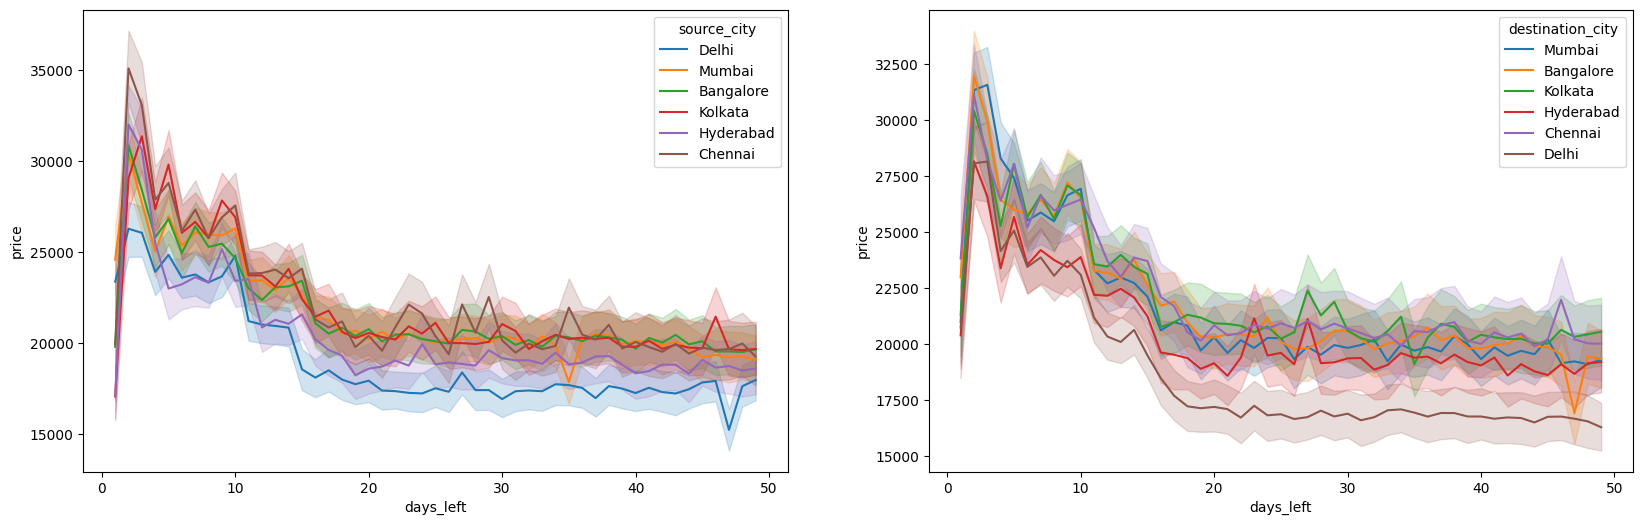

In [80]:
# Range of price of flights with source and destination city according to the days left

fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(data=data, x='days_left', y='price',hue='source_city',ax=ax[0])
sns.lineplot(data=data, x='days_left', y='price',hue='destination_city',ax=ax[1])
plt.show()

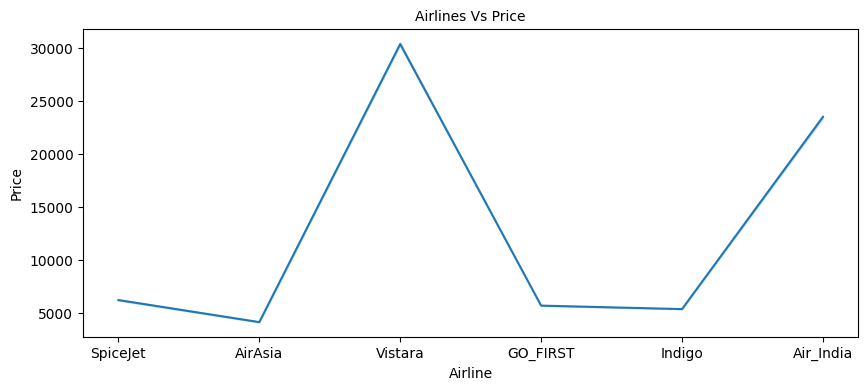

In [81]:

plt.figure(figsize=(10,4))
sns.lineplot(x=data['airline'], y=data['price'])
plt.title('Airlines Vs Price', fontsize=10)
plt.xlabel('Airline', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()

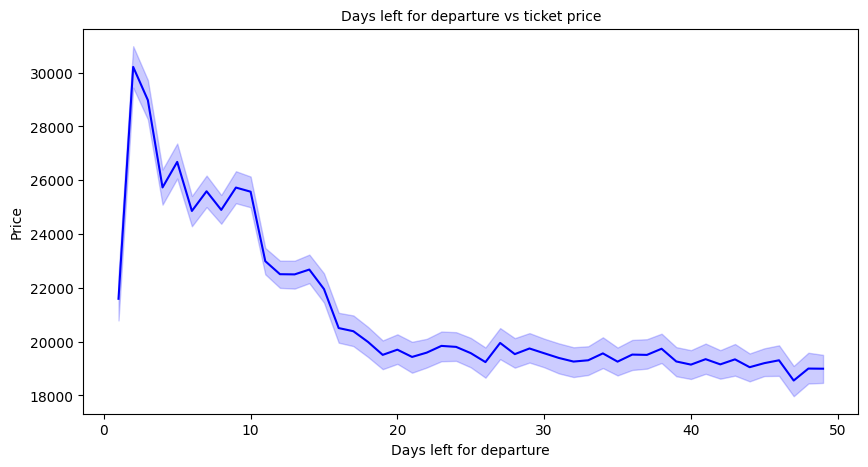

In [82]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='days_left', y='price',color='blue')
plt.title('Days left for departure vs ticket price', fontsize=10)
plt.xlabel('Days left for departure', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()

## Analyse unique values 

In [114]:
def unique(values):
    return values.unique()
    
    
print("Unique values in airline --> ", unique(data['airline']))
print("Unique values in flight --> ", unique(data['flight']))
print("Unique values in source_city --> ", unique(data['source_city']))
print("Unique values in departure_time --> ", unique(data['departure_time']))
print("Unique values in stops --> ", unique(data['stops']))
print("Unique values in arrival_time --> ", unique(data['arrival_time']))
print("Unique values in destination_city --> ", unique(data['destination_city']))
print("Unique values in class --> ", unique(data['class']))


Unique values in airline -->  ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in flight -->  ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
Unique values in source_city -->  ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique values in departure_time -->  ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique values in stops -->  ['zero' 'one' 'two_or_more']
Unique values in arrival_time -->  ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique values in destination_city -->  ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique values in class -->  ['Economy' 'Business']


## With bar grap plot

In [115]:
# Get a list of all column names in the DataFrame
col = list(data.columns)

# Initialize an empty list to store the column names of categorical features
col_list = []

# Iterate over each column name in the list of all column names
for i in col:
    # Check if the data type of the column is 'object', indicating a categorical feature
    if data[i].dtype == 'object':
        # If the data type is 'object', add the column name to the list of categorical features
        col_list.append(i)

# Output the list of column names representing categorical features
col_list

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [116]:
# Import the necessary library
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
le = LabelEncoder()

# Iterate through each column name in the list of categorical features
for i in col_list:
    # Apply label encoding to the current column and replace it with the transformed values
    data[i] = le.fit_transform(data[i])

# Output the information about the DataFrame after label encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 18.3 MB


## Check for outliers 

# Feature Selection

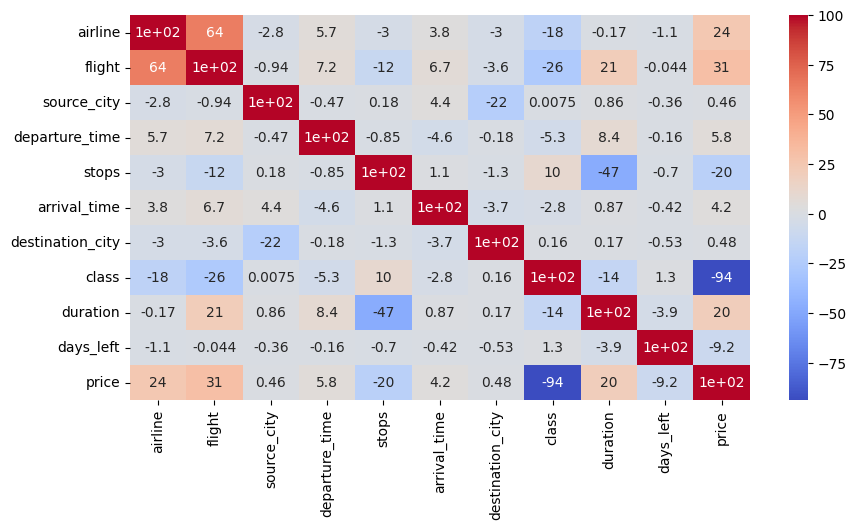

In [117]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr()*100, annot=True, cmap='coolwarm')
plt.show()

In [119]:
# Selecting the features using VIF. VIF should be less than 5. So drop the stops feature.

In [118]:
# Import necessary libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# Create an empty list to store column names of numerical features (excluding the target variable 'price')
col_list = []

# Iterate through each column in the DataFrame
for i in data.columns:
    # Check if the column is numerical (not 'object') and not the target variable
    if ((data[i].dtype != 'object') and (i != 'price')):
        # Append the column name to the list of numerical features
        col_list.append(i)

# Create a new DataFrame containing only the numerical features
X = data[col_list]

# Calculate VIF for each feature
vif_values = [VIF(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame to store the feature names and their corresponding VIF values
vif_data = pd.DataFrame({'feature': X.columns, 'VIF': vif_values})

# Print the DataFrame containing feature names and their corresponding VIF values
print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
col_list=[]
for i in data.columns:
    if((data[i].dtype!='object')& (i != 'price')):
        col_list.append(i)

X=data[col_list]
vif_data = pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[VIF(X.values,i) for i in range(len(X.columns))]

print(vif_data)

            feature        VIF
0           airline   6.701818
1            flight  12.675046
2       source_city   2.969540
3    departure_time   2.806009
4             stops   1.437326
5      arrival_time   3.784873
6  destination_city   2.918792
7             class   2.852072
8          duration   4.754588
9         days_left   4.071591


In [123]:
data=data.drop(columns=["flight"])

In [124]:
# Import necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# Create an empty list to store column names of numerical features (excluding the target variable 'price')
col_list = []

# Iterate through each column in the DataFrame
for i in data.columns:
    # Check if the column is numerical (not 'object') and not the target variable
    if ((data[i].dtype != 'object') and (i != 'price')):
        # Append the column name to the list of numerical features
        col_list.append(i)

# Create a new DataFrame containing only the numerical features
X = data[col_list]

# Create an empty DataFrame to store the VIF values for each feature
vif_data = pd.DataFrame()

# Add 'feature' column to the DataFrame with column names
vif_data['feature'] = X.columns

# Calculate VIF for each feature and store the results in the 'VIF' column of the DataFrame
vif_data['VIF'] = [VIF(X.values, i) for i in range(len(X.columns))]

# Print the DataFrame containing feature names and their corresponding VIF values
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


# Model Training

In [125]:
# Import necessary libraries


# Assuming 'data' is your DataFrame containing features and target variable
# Drop the target variable ('price') from the DataFrame to create the feature matrix 'X'
X = data.drop(columns=['price'])

# Extract the target variable ('price') and store it in 'y'
y = data['price']

# Split the dataset into training and testing sets, with 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler to scale the features
scaler = StandardScaler()

# Fit and transform the training data using the StandardScaler
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the Linear Regression model on the scaled training data
lr.fit(x_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = lr.predict(x_test_scaled)

# Create a DataFrame to compare actual values (y_test) with predicted values (y_pred)
difference = pd.DataFrame(np.c_[y_test, y_pred], columns=["Actual_Value", "Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [130]:
# Import necessary libraries

# Calculate R-squared (coefficient of determination) to evaluate the model's goodness of fit
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Absolute Error (MAE) to measure the average absolute errors between predicted and actual values
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mean_abs_error)

# Calculate Mean Absolute Percentage Error (MAPE) to measure the percentage of absolute errors relative to actual values
# Note: MAPE might not be well-defined for zero values in 'y_test'
mbpe = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mbpe)

# Calculate Mean Squared Error (MSE) to measure the average squared differences between predicted and actual values
mean_sq_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)

# Calculate Root Mean Squared Error (RMSE) to measure the square root of MSE, which is in the same units as the target variable
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", root_mean_sq_error)

R-squared: 0.904554350718816
Mean Absolute Error: 4624.994868017024
Mean Absolute Percentage Error: 0.43535810896835475
Mean Squared Error: 49200540.29372198
Root Mean Squared Error: 7014.309680483318


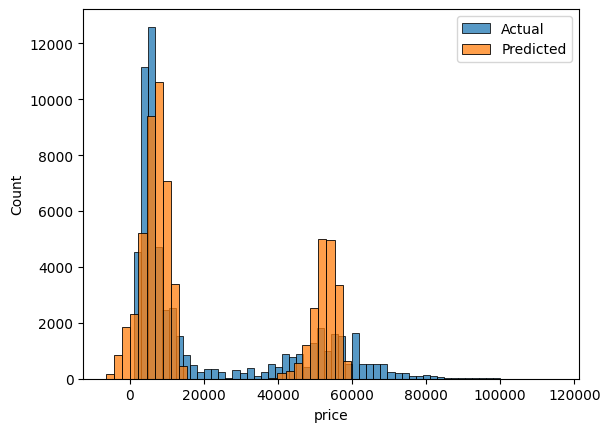

In [131]:

sns.histplot(y_test, label='Actual')
sns.histplot(y_pred, label='Predicted')
plt.legend()
     

In [132]:


# Create a DecisionTreeRegressor instance
dt = DecisionTreeRegressor()

# Fit the Decision Tree Regressor to the training data
dt.fit(x_train, y_train)

# Predict target values for the test data
y_pred = dt.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculate the mean absolute error
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mean_abs_error)

# Calculate the mean absolute percentage error
mean_abs_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mean_abs_percentage_error)

# Calculate the mean squared error
mean_sq_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)

# Calculate the root mean squared error
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", root_mean_sq_error)

R-squared score: 0.9755684422975565
Mean Absolute Error: 1177.691742599657
Mean Absolute Percentage Error: 0.07448828265232077
Mean Squared Error: 12594034.911284726
Root Mean Squared Error: 3548.807533705474


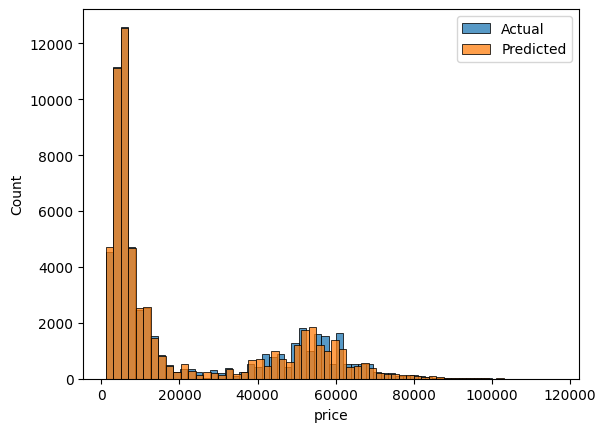

In [133]:
sns.histplot(y_test, label='Actual')
sns.histplot(y_pred, label='Predicted')
plt.legend()

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# Create a RandomForestRegressor instance
rfr = RandomForestRegressor()

# Fit the Random Forest Regressor to the training data
rfr.fit(x_train, y_train)

# Predict target values for the test data
y_pred = rfr.predict(x_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculate the mean absolute error
mean_abs_error = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mean_abs_error)

# Calculate the mean absolute percentage error
mean_abs_percentage_error = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mean_abs_percentage_error)

# Calculate the mean squared error
mean_sq_error = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mean_sq_error)

# Calculate the root mean squared error
root_mean_sq_error = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", root_mean_sq_error)

R-squared score: 0.984955943038284
Mean Absolute Error: 1091.4211739959185
Mean Absolute Percentage Error: 0.07055625617268613
Mean Squared Error: 7754944.686324995
Root Mean Squared Error: 2784.7701316850184


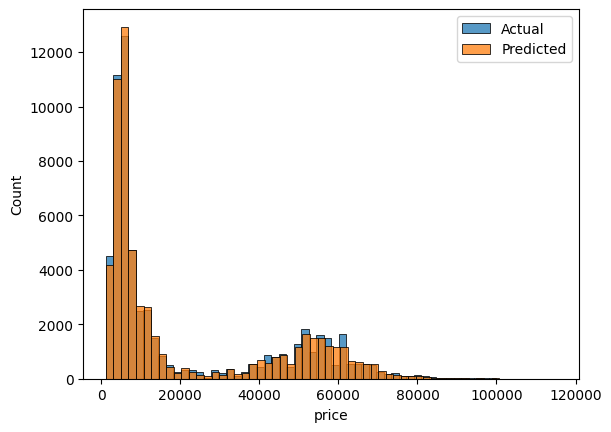

In [135]:
sns.histplot(y_test, label='Actual')
sns.histplot(y_pred, label='Predicted')
plt.legend()

In [ ]:
Project:

Disease Detection in Crops:
    Detecting plant diseases is crucial for ensuring crop health and maximizing agricultural productivity.
    Developed disease detection model to detect how healty crop is.
    Leveraging TensorFlow for Plant Disease Detection
    Use to detect is it healthy, having some defeciency and based on result use to provide treatment.
    Laverage Deep learning CNN technique to build it using transfer learning.
    Leveraging pre-trained models like ResNet152V2 enables efficient transfer learning for plant disease detection tasks.
    TensorFlow provides a powerful framework for building, training, and deploying deep learning models, making it ideal for plant disease detection.
    Utilize the Keras applications module within TensorFlow to access pre-trained models such as ResNet152V2 for transfer learning.
    Outline the steps involved in training the ResNet152V2 model using TensorFlow, emphasizing the transfer learning approach for plant disease detection.​
    Creating Docker image for the ResNet152V2 model, ensuring compatibility and encapsulation of the deep learning environment.
    
    Creating Docker image for the ResNet152V2 model, ensuring compatibility and encapsulation of the deep learning environment.

    

In [ ]:




Transfer Learning with Pre-Trained YOLOv8 Models: Fine-tuned pre-trained YOLOv8 models on crop grain datasets, enabling efficient transfer learning to adapt the model for specific grain quality detection tasks.

TensorFlow Integration for Video Processing: Integrated YOLOv8 with TensorFlow for seamless video processing, enabling continuous frame-by-frame evaluation of grain quality in live video streams.

YOLOv8 for Grain Defect Detection and Classification: Implemented YOLOv8’s segmentation and classification capabilities to detect various defects and quality issues in grains, including discoloration, cracks, and irregularities.

Optimizing YOLOv8 for Edge and Mobile Devices: Converted the YOLOv8 model to TensorFlow Lite (.tflite) format, optimizing it for real-time inference on mobile or edge devices for efficient video grading.

Creating Docker Image for Video Grading Deployment: Dockerized the YOLOv8 model, ensuring compatibility and encapsulation of the deep learning environment, making it easy to deploy the video grading solution at scale.

End-to-End Grading System for Crop Grain Quality: Developed a full pipeline for grading crop grain quality, from training the YOLOv8 model to deploying a video-based grading system for automated, real-time quality assessment.